In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib notebook
import glob
import os
import pickle
import pymzn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import config
import data_loader
import statsmodel
import evaluation

Using TensorFlow backend.


# Gather Data

Run file calculate_motivation.py and execute resulting shell scripts.

# Evaluate Results

In [16]:
df = data_loader.join_result_csvs(config.OUTPUT_DIR, 'threemin/motivation_*.csv')
df = df.fillna(0)

baseline = data_loader.get_baseline(include_failed=True)
baseline['Failed'] = baseline['Failed'] | baseline['Objective'].isnull()
baseline['Dataset'] = 0

/home/helge/Dropbox/Simula/CpBoundEst/cpboundest_vatras/threemin/motivation_depot-placement.csv is empty


In [3]:
baseline_filter = (baseline.Solver.isin(df.Solver.unique()) & baseline.Problem.isin(df.Problem.unique()) & baseline.DZN.isin(df.DZN.unique()))
df = pd.concat([df, baseline[baseline_filter]], ignore_index=True)

In [17]:
aggdf = df.groupby(['Problem', 'Solver', 'Dataset'], as_index=False).agg({
    'DZN': lambda s: s.nunique(),
    'Duration': np.mean,
    'Objective': np.mean,
    'Complete': np.mean,
    'Failed': np.mean
})
aggdf.to_clipboard()
#aggdf = aggdf.rename(columns = {'Dataset':'Objective Bound'})
#aggdf.pivot(index='Solver', columns='Objective Bound', values='succeeded').style.format('{:.2%}').set_caption('% of TSP instances succeeded in < 60 sec')

In [18]:
df.groupby(['Problem', 'Solver', 'Dataset'], as_index=False).mean()

,Problem,Solver,Dataset,Duration,Objective,Complete,Failed,ObjBound
0,2DBinPacking,cbc,0.00,0.139333,7.466667,1.000000,0.000000,0.000000
1,2DBinPacking,cbc,1.00,0.344667,7.466667,1.000000,0.000000,7.466667
2,2DBinPacking,cbc,1.05,0.131333,7.466667,1.000000,0.000000,8.533333
3,2DBinPacking,cbc,1.10,0.130000,7.466667,1.000000,0.000000,8.800000
4,2DBinPacking,cbc,1.15,0.131333,7.466667,1.000000,0.000000,9.266667
5,2DBinPacking,cbc,1.20,0.132000,7.466667,1.000000,0.000000,9.533333
6,2DBinPacking,cbc,1.50,0.136000,7.466667,1.000000,0.000000,11.466667
7,2DBinPacking,cbc,2.00,0.133333,7.466667,1.000000,0.000000,14.933333
8,2DBinPacking,chuffed,0.00,5.978000,7.466667,1.000000,0.000000,0.000000
9,2DBinPacking,chuffed,1.00,5.987333,7.466667,1.000000,0.000000,7.466667


## Instances with results

In [102]:
df.groupby(['Problem', 'Dataset', 'Solver'], as_index=False).agg({
    'DZN': lambda s: s.nunique(),
    'Duration': np.mean,
    'Objective': np.mean,
    'Complete': np.mean,
    'Failed': np.mean
}).pivot_table(index=['Problem', 'Dataset'], columns='Solver')

Complete                                 DZN          \
Solver                        cbc   chuffed     cplex    gecode   cbc chuffed   
Problem         Dataset                                                         
2DBinPacking    0.00     1.000000  0.300000       NaN  0.266667  30.0    30.0   
                1.10     0.967742  0.300000       NaN  0.266667  30.0    30.0   
                1.25     0.966667  0.300000       NaN  0.266667  30.0    30.0   
                1.50     0.966667  0.300000       NaN  0.266667  30.0    30.0   
                2.00     0.966667  0.300000       NaN  0.266667  30.0    30.0   
                3.00     0.966667  0.300000       NaN  0.266667  30.0    30.0   
                5.00     0.966667  0.300000       NaN  0.266667  30.0    30.0   
                10.00    0.966667  0.300000       NaN  0.266667  30.0    30.0   
depot-placement 0.00     0.000000  0.875000       NaN  0.625000  24.0    24.0   
                1.10     0.000000  0.875000       NaN  0.625000  24.0    24.0   
                1.25     0.000000  0.875000       NaN  0.625000  24.0    24.0   
                1.50     0.041667  0.875000       NaN  0.625000  24.0    24.0   
                2.00     0.000000  0.875000       NaN  0.625000  24.0    24.0   
                3.00     0.000000  0.875000       NaN  0.625000  24.0    24.0   
                5.00     0.000000  0.875000       NaN  0.625000  24.0    24.0   
                10.00    0.083333  0.875000       NaN  0.625000  24.0    24.0   
jobshop         0.00     0.066667  0.233333       NaN  0.033333  30.0    30.0   
                1.10     0.000000  0.000000       NaN  0.000000  30.0    30.0   
                1.25     0.000000  0.000000       NaN  0.000000  30.0    30.0   
                1.50     0.000000  0.000000       NaN  0.000000  30.0    30.0   
                2.00     0.000000  0.000000       NaN  0.000000  30.0    30.0   
                3.00     0.000000  0.000000       NaN  0.000000  30.0    30.0   
                5.00     0.000000  0.000000       NaN  0.000000  30.0    30.0   
                10.00    0.000000  0.000000       NaN  0.000000  30.0    30.0   
mrcpsp          0.00     0.733333  1.000000       NaN  0.900000  30.0    30.0   
                1.10     0.833333  1.000000       NaN  0.966667  30.0    29.0   
                1.25     0.833333  1.000000       NaN  0.900000  30.0    30.0   
                1.50     0.833333  1.000000       NaN  0.900000  30.0    30.0   
                2.00     0.833333  1.000000       NaN  0.900000  30.0    30.0   
                3.00     0.833333  1.000000       NaN  0.900000  30.0    30.0   
...                           ...       ...       ...       ...   ...     ...   
table-layout    0.00     1.000000  1.000000       NaN  0.269231  26.0    26.0   
                1.10     0.000000  0.000000       NaN  0.000000  26.0    26.0   
                1.25     0.000000  0.000000       NaN  0.000000  26.0    26.0   
                1.50     0.000000  0.000000       NaN  0.000000  26.0    26.0   
                2.00     0.000000  0.000000       NaN  0.000000  26.0    26.0   
                3.00     0.000000  0.000000       NaN  0.000000  26.0    26.0   
                5.00     0.000000  0.000000       NaN  0.000000  26.0    26.0   
                10.00    0.000000  0.000000       NaN  0.000000  26.0    26.0   
tsp             1.10     0.000000  0.093750  0.060606  0.147059  29.0    30.0   
                1.25     0.000000  0.085714  0.058824  0.181818  30.0    30.0   
                1.50     0.000000  0.060606  0.066667  0.166667  30.0    29.0   
                2.00     0.000000  0.090909  0.062500  0.166667  30.0    30.0   
                3.00     0.000000  0.058824  0.062500  0.193548  30.0    30.0   
                5.00     0.000000  0.064516  0.093750  0.181818  30.0    30.0   
                10.00    0.000000  0.062500  0.088235  0.212121  30.0    30.0   
tsp-gcc         1.10     0.000000  0.000000  0.000000  0

<IPython.core.display.Javascript object>


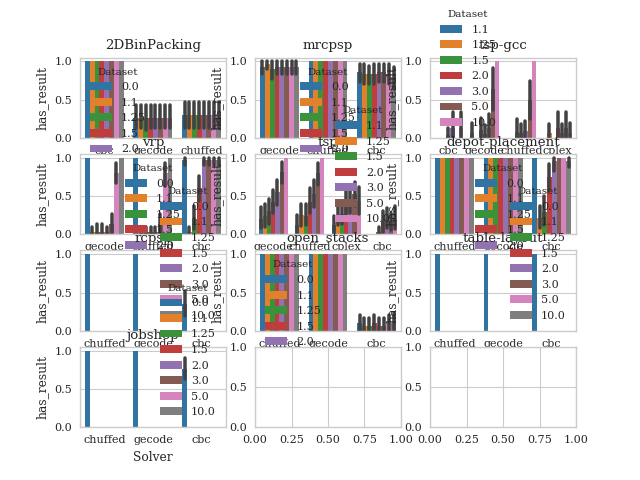

In [103]:
problems = df.Problem.nunique()
fig, axes = plt.subplots(np.ceil(problems / 3).astype(int), 3, squeeze=False)

df['has_result'] = df['Objective'].notnull()

for ax, problem in zip(axes.flatten(), df.Problem.unique()):
    sns.barplot(x='Solver', y='has_result', hue='Dataset', data=df[df.Problem == problem], ax=ax)
    ax.set_title(problem)

## Objective

In [104]:
#df.Objective
adf = df[['Problem', 'Solver', 'DZN', 'Dataset', 'Objective']].pivot_table(index=['Problem', 'Solver', 'DZN'], columns='Dataset')
adf = adf.apply(lambda x: x['Objective'] / x['Objective'][0.00], axis=1)
#adf.groupby(['Problem', 'Solver']).min()
adf[adf.min(axis=1) < 1]

Dataset                                   0.00      1.10      1.25      1.50   \
Problem         Solver DZN                                                      
depot-placement cbc    a280_6.dzn           1.0       NaN       NaN  0.753086   
                       att48_4.dzn          1.0  0.996745  1.078820  1.075495   
                       rat99_4.dzn          1.0       NaN  1.085470  1.256410   
                       rat99_6.dzn          1.0       NaN       NaN       NaN   
                       st70_4.dzn           1.0  0.928994  0.940828  0.958580   
                       st70_5.dzn           1.0       NaN       NaN  0.679715   
                       st70_6.dzn           1.0       NaN       NaN       NaN   
                       ts225_5.dzn          1.0       NaN       NaN  0.700000   
                       ts225_6.dzn          1.0       NaN       NaN       NaN   
                       u159_4.dzn           1.0  0.907193  0.857889  1.000870   
                       u159_5.dzn           1.0       NaN       NaN  0.993847   
                       u159_6.dzn           1.0       NaN       NaN  0.936497   
                       ulysses16_4.dzn      1.0       NaN  0.857889  0.902842   
                       ulysses16_5.dzn      1.0       NaN       NaN  0.909881   
                       ulysses16_6.dzn      1.0       NaN       NaN  0.936497   
                       ulysses22_4.dzn      1.0       NaN  1.051236  0.938216   
                       ulysses22_5.dzn      1.0       NaN       NaN  0.869125   
                       ulysses22_6.dzn      1.0       NaN       NaN       NaN   
                gecode att48_6.dzn          1.0  0.776164  0.815784  0.864908   
mrcpsp          cbc    j14_61_10.dzn        1.0  0.758621  0.758621  0.758621   
                       j30_22_2.dzn         1.0       NaN       NaN       NaN   
                gecode m4_21_5.dzn          1.0  0.771429       NaN  1.000000   
vrp             cbc    A-n32-k5.vrp.dzn     1.0       NaN       NaN  1.126223   
                       A-n37-k6.vrp.dzn     1.0       NaN  0.798036  0.802244   
                       A-n39-k5.vrp.dzn     1.0       NaN       NaN  0.993934   
                       A-n53-k7.vrp.dzn     1.0       NaN       NaN       NaN   
                       A-n60-k9.vrp.dzn     1.0       NaN       NaN  0.887112   
                       A-n64-k9.vrp.dzn     1.0       NaN       NaN       NaN   
                       B-n34-k5.vrp.dzn     1.0       NaN  0.867414  0.852474   
                       B-n45-k5.vrp.dzn     1.0       NaN       NaN       NaN   
                       B-n56-k7.vrp.dzn     1.0       NaN       NaN  0.904612   
                       P-n21-k2.vrp.dzn     1.0       NaN  0.981818  1.204545   
                       P-n22-k2.vrp.dzn     1.0       NaN  1.012987  1.008658   
                       P-n50-k7.vrp.dzn     1.0       NaN       NaN  0.883100   
                       P-n55-k15.vrp.dzn    1.0       NaN       NaN  0.941935   
                       P-n60-k15.vrp.dzn    1.0       NaN       NaN  0.996022   
                gecode A-n60-k9.vrp.dzn     1.0       NaN       NaN       NaN   
                       A-n63-k10.vrp.dzn    1.0       NaN       NaN       NaN   
                       B-n56-k7.vrp.dzn     1.0       NaN       NaN       NaN   
                       B-n78-k10.vrp.dzn    1.0       NaN       NaN       NaN   

Dataset                                      2.00      3.00      5.00   \
Problem         Solver DZN                                               
depot-placement cbc    a280_6.dzn         1.189300  0.851852  1.259259   
                       att48_4.dzn        1.102646  1.097382  1.053470   
                       rat99_4.dzn        0.931624  0.897436  1.376068   
                       rat99_6.dzn        0.753788  0.901515  0.715909   
                       st70_4.dzn         0.940828  0.881657  0.911243   
                       st70_5.dzn         0.914591  0.797153  0.736655   
     

<IPython.core.display.Javascript object>


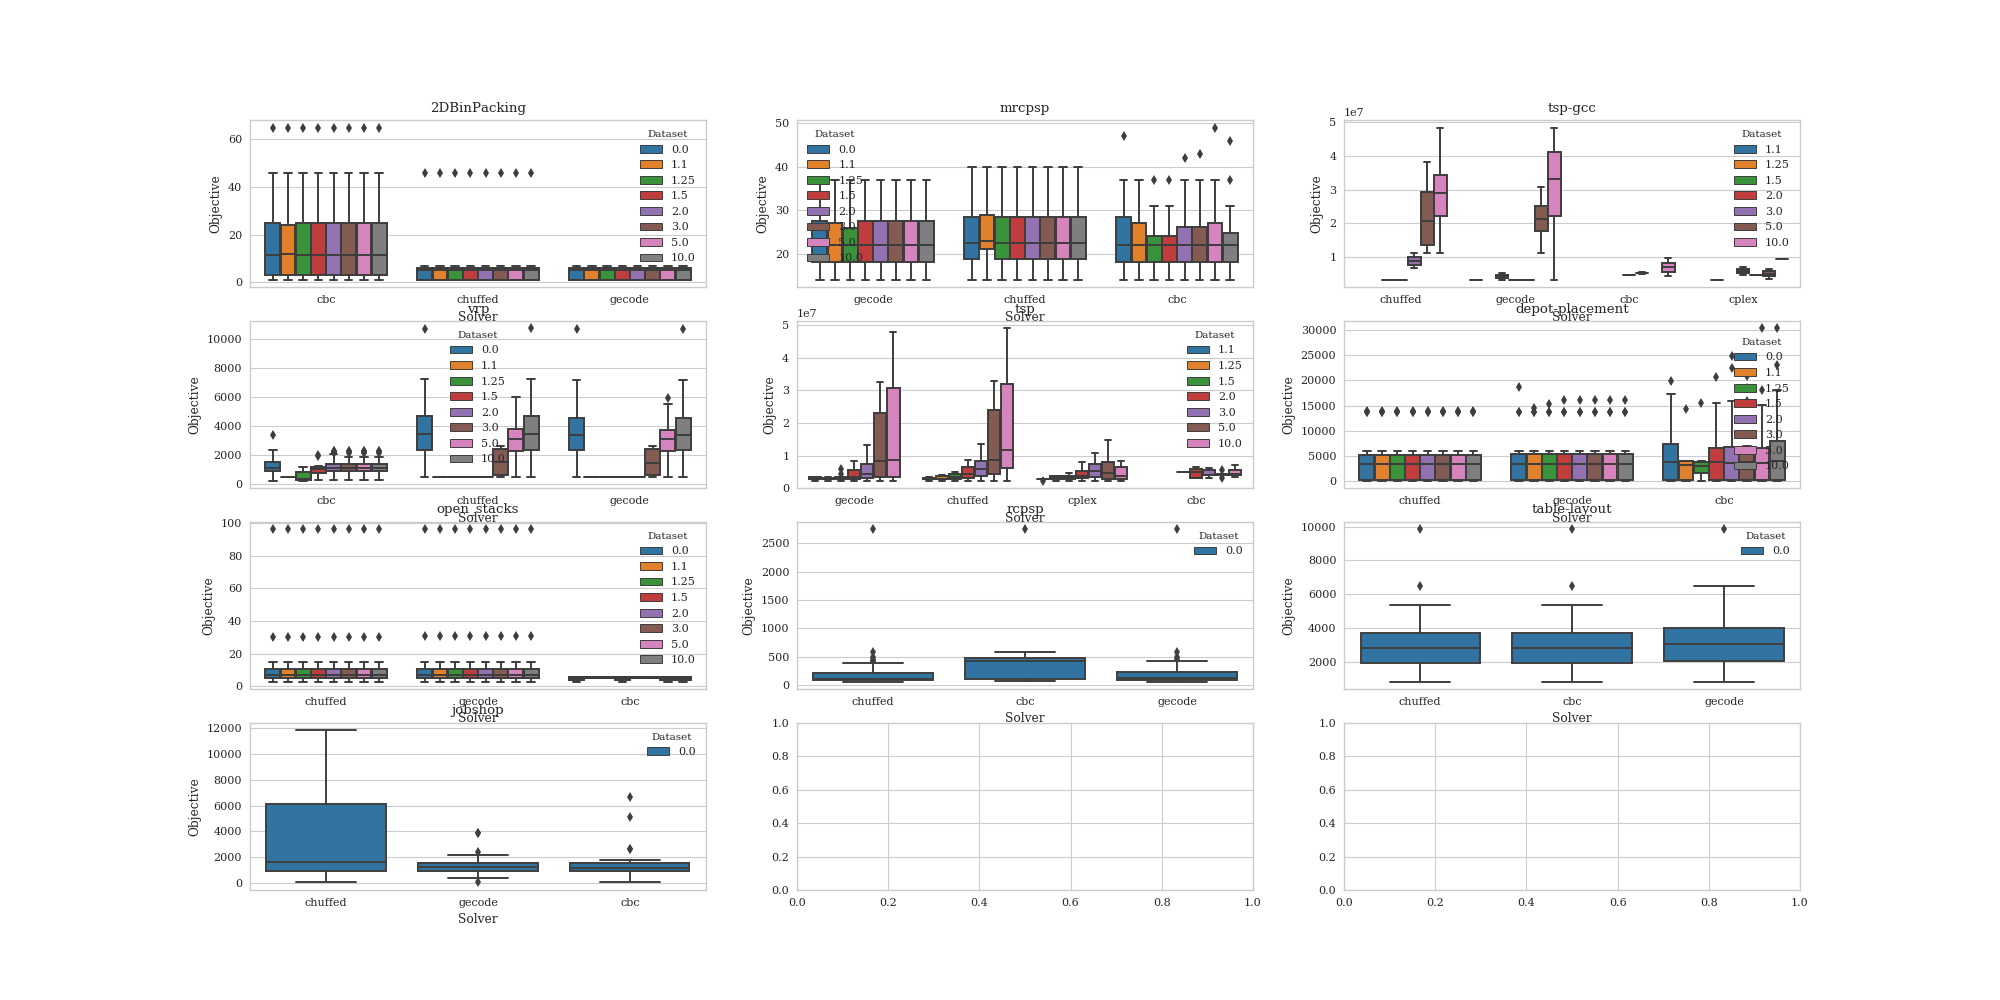

In [105]:
problems = df.Problem.nunique()
fig, axes = plt.subplots(np.ceil(problems / 3).astype(int), 3, squeeze=False, figsize=(20,10))

rel_df = df[df.Objective.notnull()]

for ax, problem in zip(axes.flatten(), rel_df.Problem.unique()):
    sns.boxplot(x='Solver', y='Objective', hue='Dataset', data=rel_df[rel_df.Problem == problem], ax=ax)
    ax.set_title(problem)
    
plt.savefig('motivation_objectives.png', dpi=400, bbox_inches='tight')


<IPython.core.display.Javascript object>


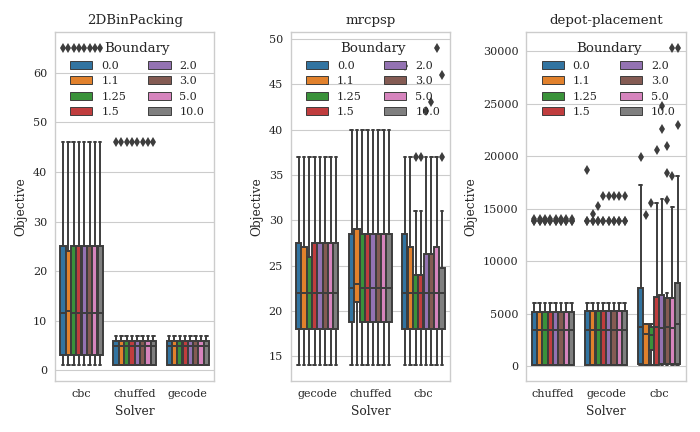

In [112]:
problems = ['2DBinPacking', 'mrcpsp', 'depot-placement']

fig, axes = plt.subplots(1, 3, figsize=evaluation.figsize_text(1.0))

for ax, problem in zip(axes.flatten(), problems):
    sns.boxplot(x='Solver', y='Objective', hue='Dataset', data=rel_df[rel_df.Problem == problem], ax=ax)
    ax.set_title(problem)
    ax.legend(ncol=2, loc=1, title='Boundary')

plt.tight_layout()
plt.savefig('motivation_objectives_negative.pgf', dpi=400, bbox_inches='tight')

<IPython.core.display.Javascript object>


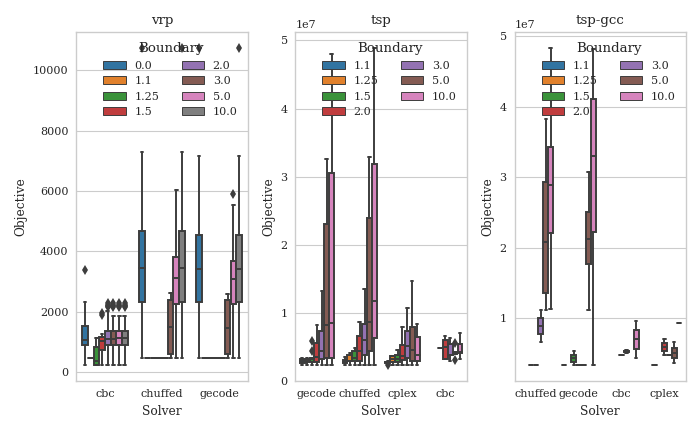

In [113]:
problems = ['vrp', 'tsp', 'tsp-gcc']

fig, axes = plt.subplots(1, 3, figsize=evaluation.figsize_text(1.0))

for ax, problem in zip(axes.flatten(), problems):
    sns.boxplot(x='Solver', y='Objective', hue='Dataset', data=rel_df[rel_df.Problem == problem], ax=ax)
    ax.set_title(problem)
    ax.legend(ncol=2, loc=1, title='Boundary')

plt.tight_layout()
plt.savefig('motivation_objectives_positive.pgf', dpi=400, bbox_inches='tight')

In [128]:
problems = ['2DBinPacking', 'mrcpsp', 'depot-placement', 'vrp', 'tsp', 'tsp-gcc']

df.loc[df.Dataset.isnull(),'Dataset'] = 0
df['HasObjective'] = df['Objective'].notnull()
tabdf = df[df.Problem.isin(problems)]
tabdf = tabdf[['Problem', 'Solver', 'Dataset', 'HasObjective']].groupby(['Problem', 'Solver', 'Dataset'], as_index=False).mean()
tabdf = tabdf.round(1)
print(tabdf.pivot_table(index=['Problem', 'Solver'], columns=['Dataset']).to_latex())

\begin{tabular}{llrrrrrrrr}
\toprule
             & \{\} & \multicolumn{8}{l}{HasObjective} \\
             & Dataset &         0.0  & 1.1  & 1.2  & 1.5  & 2.0  & 3.0  & 5.0  & 10.0 \\
Problem & Solver &              &      &      &      &      &      &      &      \\
\midrule
2DBinPacking & cbc &          1.0 &  1.0 &  1.0 &  1.0 &  1.0 &  1.0 &  1.0 &  1.0 \\
             & chuffed &          0.3 &  0.3 &  0.3 &  0.3 &  0.3 &  0.3 &  0.3 &  0.3 \\
             & gecode &          0.3 &  0.3 &  0.3 &  0.3 &  0.3 &  0.3 &  0.3 &  0.3 \\
depot-placement & cbc &          1.0 &  0.2 &  0.3 &  0.8 &  1.0 &  1.0 &  1.0 &  1.0 \\
             & chuffed &          1.0 &  1.0 &  1.0 &  1.0 &  1.0 &  1.0 &  1.0 &  1.0 \\
             & gecode &          1.0 &  1.0 &  1.0 &  1.0 &  1.0 &  1.0 &  1.0 &  1.0 \\
mrcpsp & cbc &          0.9 &  0.8 &  0.8 &  0.8 &  0.9 &  0.9 &  0.8 &  0.8 \\
             & chuffed &          1.0 &  1.0 &  1.0 &  1.0 &  1.0 &  1.0 &  1.0 &  1.0 \\
             & geco